# Lab 4

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import random, math

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:

def Plot2D(T, title, x, y, num_to_plot=40):
  # This method picks a bunch of random samples (images in your case)
  # to plot onto the chart:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
  for i in range(num_to_plot):
    img_num = int(random.random() * num_images)
    x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
    x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
    img = df.iloc[img_num,:].reshape(num_pixels, num_pixels)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)



In [3]:
# A .MAT file is a .MATLAB file. The faces dataset could have came
# in through .png images, but we'll show you how to do that in
# anither lab. For now, you'll see how to import .mats:
mat = scipy.io.loadmat('Datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
  df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


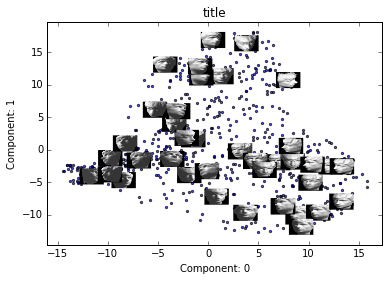

In [6]:
#
# TODO: Implement PCA here. Reduce the dataframe df down
# to THREE components. Once you've done that, call Plot2D.
#
# The format is: Plot2D(T, title, x, y, num_to_plot=40):
# T is your transformed data, NDArray.
# title is your chart title
# x is the principal component you want displayed on the x-axis, Can be 0 or 1
# y is the principal component you want displayed on the y-axis, Can be 1 or 2
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
T=pca.transform(df)

Plot2D(T, 'title', 0,1,num_to_plot=40)
plt.show()

/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


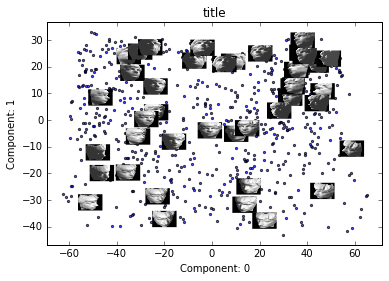

In [11]:
#
# TODO: Implement Isomap here. Reduce the dataframe df down
# to THREE components. Once you've done that, call Plot2D using
# the first two components.
#
# .. your code here ..
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=8, n_components=3)
iso.fit(df)
manifold = iso.transform(df)
Plot2D(manifold, 'title', 0,1,num_to_plot=40)

#
# TODO: If you're up for a challenge, draw your dataframes in 3D
# Even if you're not, just do it anyway.
#
# .. your code here ..


plt.show()


/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


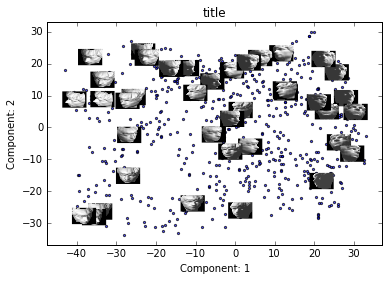

In [12]:
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=8, n_components=3)
iso.fit(df)
manifold = iso.transform(df)
Plot2D(manifold, 'title', 1,2,num_to_plot=40)

#
# TODO: If you're up for a challenge, draw your dataframes in 3D
# Even if you're not, just do it anyway.
#
# .. your code here ..


plt.show()

# Lab 5

In [83]:
import os
from scipy import misc
fileList = []
fileDir = 'Datasets/ALOI/32/'
for filename in os.listdir(fileDir):
    fileList.append([i for i in misc.imread(fileDir+filename).flat])
    
fileDir2 = 'Datasets/ALOI/32I/'
for filename in os.listdir(fileDir2):
    fileList.append([i for i in misc.imread(fileDir2+filename).flat])

print(len(fileList))


84


In [62]:
print(fileList[0])
print('\n')


[4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 7, 6, 7, 7, 7, 7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 6, 7, 7, 7, 

In [84]:
df = pd.DataFrame(fileList)

In [64]:

print(df.head(5))
print('\n')
print(df.describe())
print(df.shape)

   0      1      2      3      4      5      6      7      8      9      \
0      4      4      4      3      3      3      3      3      3      3   
1      4      4      4      3      4      4      3      3      4      4   
2      4      4      4      4      4      4      4      4      4      4   
3      4      4      4      4      4      4      4      4      4      4   
4      4      4      4      4      4      4      4      4      4      4   

   ...    27638  27639  27640  27641  27642  27643  27644  27645  27646  27647  
0  ...       12     13     13     13     12     12     12     12     12      7  
1  ...       12     13     13     13     12     13     12     13     13      7  
2  ...       12     12     12     12     12     12     11     12     11      6  
3  ...       11     11     11     12     12     11     12     12     11      7  
4  ...       11     11     12     12     11     11     11     11     11      6  

[5 rows x 27648 columns]


           0          1          2 

In [73]:
def PlotIso2D(T, title, x, y, num_to_plot=40):
  # This method picks a bunch of random samples (images in your case)
  # to plot onto the chart:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title(title)
  ax.set_xlabel('Component: {0}'.format(x))
  ax.set_ylabel('Component: {0}'.format(y))
  x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
  y_size = (max(T[:,y]) - min(T[:,y])) * 0.08

  # It also plots the full scatter:
  ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

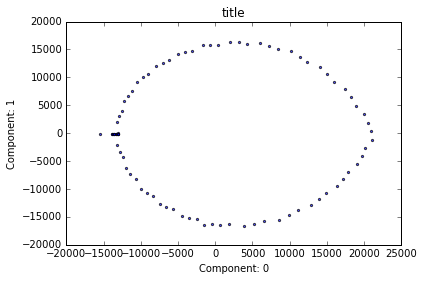

In [85]:
from sklearn import manifold
iso = manifold.Isomap(n_neighbors=6, n_components=3)
iso.fit(df)
manifold = iso.transform(df)
# print(iso)
# print(manifold)
PlotIso2D(manifold, 'title', 0,1,num_to_plot=40)
plt.show()